In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# a) Función de transición
def transition_function(rule_number):
    rule_binary = np.binary_repr(rule_number, width=8)
    rule_map = {}
    for i, output in enumerate(reversed(rule_binary)):
        input_pattern = np.binary_repr(i, width=3)
        rule_map[input_pattern] = int(output)
    print("rule_map: ", rule_map)
    return rule_map

# b) Fronteras
def apply_boundary_conditions(state, boundary_type):
    if boundary_type == 'fixed':
        return np.concatenate(([0], state, [0]))
    elif boundary_type == 'periodic':
        return np.concatenate((state[-1:], state, state[:1]))

# c) Tamaño
def cellular_automaton(rule_number, initial_state, time_steps, boundary_type):
    rule_map = transition_function(rule_number)
    grid = np.zeros((time_steps, len(initial_state)), dtype=int)
    grid[0] = initial_state

    for t in range(1, time_steps):
        extended_state = apply_boundary_conditions(grid[t-1], boundary_type)
        for i in range(len(initial_state)):
            local_state = ''.join(map(str, extended_state[i:i+3]))
            grid[t, i] = rule_map[local_state]

    return grid

# d) Condiciones iniciales
def initial_conditions(size, condition_type, custom_state=None):
    if condition_type == 'random':
        return np.random.randint(2, size=size)
    elif condition_type == 'fixed':
        state = np.zeros(size, dtype=int)
        state[size // 2] = 1
        return state
    elif condition_type == 'custom':
        if custom_state is not None:
            return np.array(custom_state, dtype=int)

# e) Salida gráfica
def plot_grid(grid):
    plt.imshow(grid, cmap='binary')
    plt.show()


rule_map:  {'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}


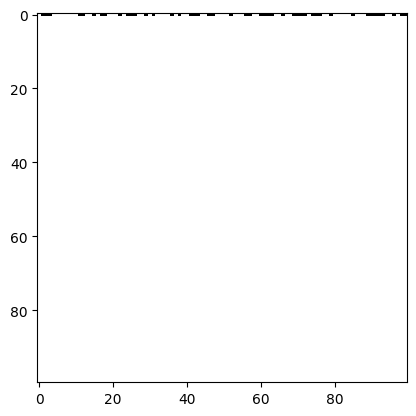

In [54]:
# Ejercicio 1: Exploración
rule_number = 0
time_steps = 100
boundary_type = 'periodic'  # Opciones: 'fixed', 'periodic'
condition_type = 'random'  # Opciones: 'random', 'fixed', 'custom'
custom_state = None  # Usar sólo si condition_type es 'custom'

initial_state = initial_conditions(size, condition_type, custom_state)
grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)
plot_grid(grid)

rule_map:  {'000': 0, '001': 0, '010': 0, '011': 1, '100': 0, '101': 0, '110': 0, '111': 0}
Regla 8


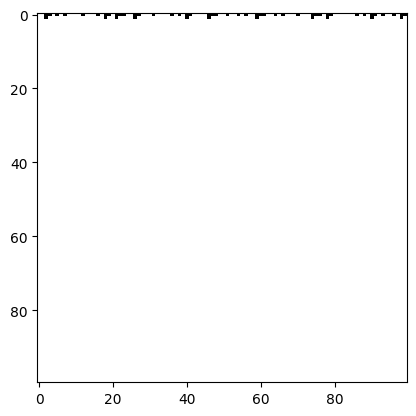

rule_map:  {'000': 1, '001': 0, '010': 0, '011': 0, '100': 0, '101': 1, '110': 0, '111': 0}
Regla 33


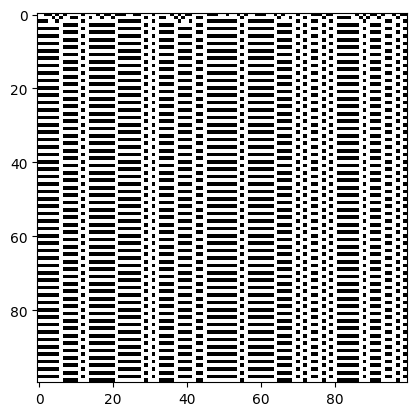

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 1, '100': 1, '101': 1, '110': 1, '111': 0}
Regla 126


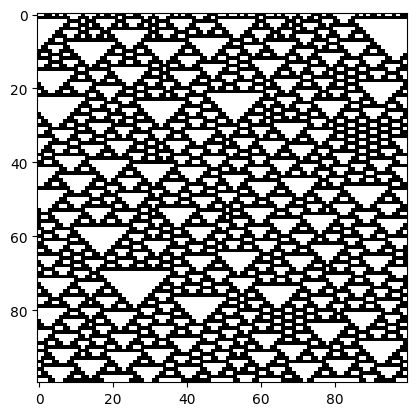

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 1, '100': 0, '101': 1, '110': 1, '111': 0}
Regla 110


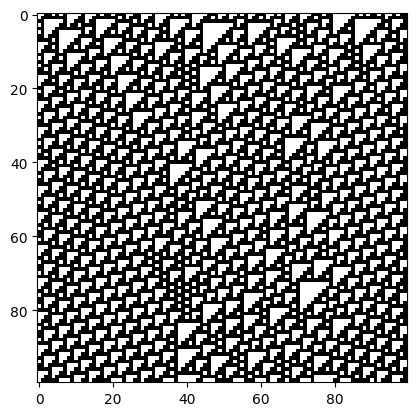

In [55]:
# Ejercicio 1: Representsción de cada regla
size = 100
time_steps = 100
boundary_type = 'periodic' 
condition_type = 'random' 
custom_state = None  
initial_state = initial_conditions(size, condition_type, custom_state)
for rule_number in [8, 33, 126, 110]:
    grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)
    print(f"Regla {rule_number}")
    plot_grid(grid)

rule_map:  {'000': 0, '001': 0, '010': 1, '011': 0, '100': 0, '101': 0, '110': 0, '111': 1}
Regla 132:


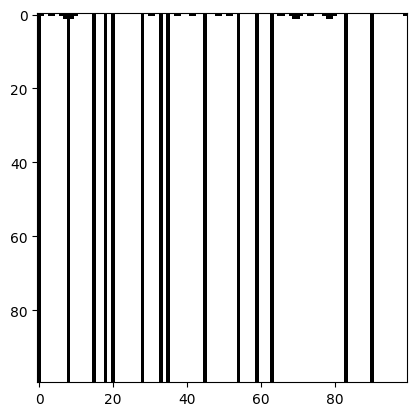

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 1, '100': 1, '101': 0, '110': 0, '111': 0}
Regla 30:


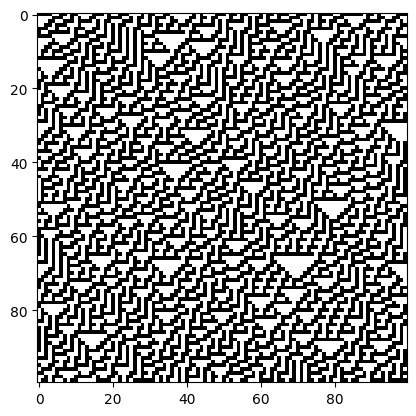

In [61]:
# Ejercicio 3: Rega 132 y 30
rule_number = 132
size = 100
time_steps = 100
boundary_type = 'periodic' 
condition_type = 'random' 
custom_state = None 
initial_state = initial_conditions(size, condition_type, custom_state)
grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)

print("Regla 132:")
plot_grid(grid)

rule_number = 30
initial_state = initial_conditions(size, condition_type, custom_state)
grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)

print("Regla 30:")
plot_grid(grid)

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 0, '100': 1, '101': 1, '110': 0, '111': 1}
Regla 182 (Incial):


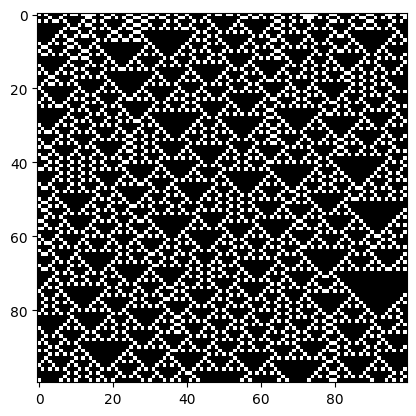

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 0, '100': 1, '101': 1, '110': 0, '111': 1}
Regla 182 (Modificando bit central):


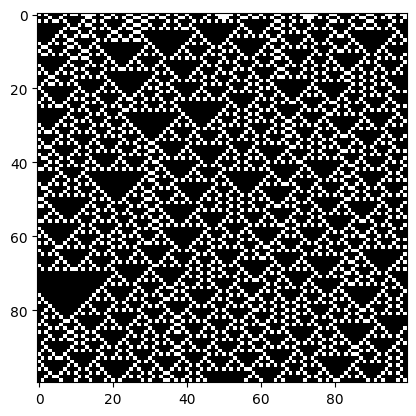

Diferencias:


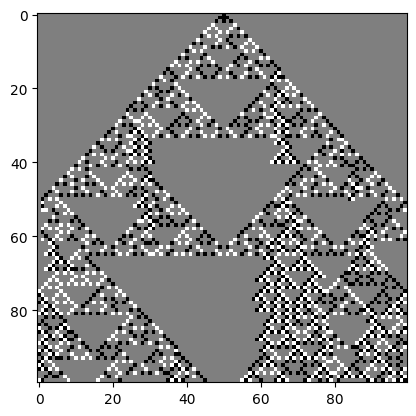

In [70]:
# Ejercicio 2: Rega 182 con estado inicial personalizado y estado modificado por 1 bit
rule_number = 182
size = 100
time_steps = 100
boundary_type = 'periodic' 
condition_type = 'custom'
custom_state = [0] * size

# Estado inicial personalizado pseudoaleatorio
for i in range(size):
    custom_state[i] = np.random.randint(2)

initial_state = initial_conditions(size, condition_type, custom_state)
initial_grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)

print("Regla 182 (Incial):")
plot_grid(initial_grid)

# Estado inicial modificado por 1 bit central
custom_state[size // 2] = 1 - custom_state[size // 2]


initial_state = initial_conditions(size, condition_type, custom_state)
modified_grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)

print("Regla 182 (Modificando bit central):")
plot_grid(modified_grid)

# Pintamos las diferencias
print("Diferencias:")
plot_grid(initial_grid - modified_grid) 


